In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as plx
from datetime import datetime
import warnings
warnings.simplefilter(action = 'ignore' , category = FutureWarning)

In [4]:
df = pd.read_csv('./Q1_data.csv' , index_col = 0)
df.head()

,symbol,name,time_stamp,time_high,time_low,open,close,high,low,market_cap,volume
0,BTC,Bitcoin,2023-05-17T23:59:59.999Z,2023-05-17T20:09:00.000Z,2023-05-17T14:03:00.000Z,27035.470130,27398.802028,27465.927904,26600.144844,5.308901e+11,1.514001e+10
1,BTC,Bitcoin,2023-05-13T23:59:59.999Z,2023-05-13T18:50:00.000Z,2023-05-13T00:32:00.000Z,26807.769044,26784.078561,27030.482960,26710.873803,5.188737e+11,9.999172e+09
2,BTC,Bitcoin,2023-03-08T23:59:59.999Z,2023-03-08T00:23:00.000Z,2023-03-08T23:43:00.000Z,22216.442321,21718.079830,22268.896252,21708.050506,4.194214e+11,2.253658e+10
3,BTC,Bitcoin,2023-02-21T23:59:59.999Z,2023-02-21T08:30:00.000Z,2023-02-21T22:06:00.000Z,24833.048914,24436.354485,25126.851686,24200.364116,4.715777e+11,3.125210e+10
4,BTC,Bitcoin,2022-10-15T23:59:59.999Z,2022-10-15T03:59:00.000Z,2022-10-15T23:04:00.000Z,19185.437304,19067.635082,19212.541608,19019.250125,3.657224e+11,1.619224e+10


Text(0.5, 1.0, 'Volume vs Market Cap')

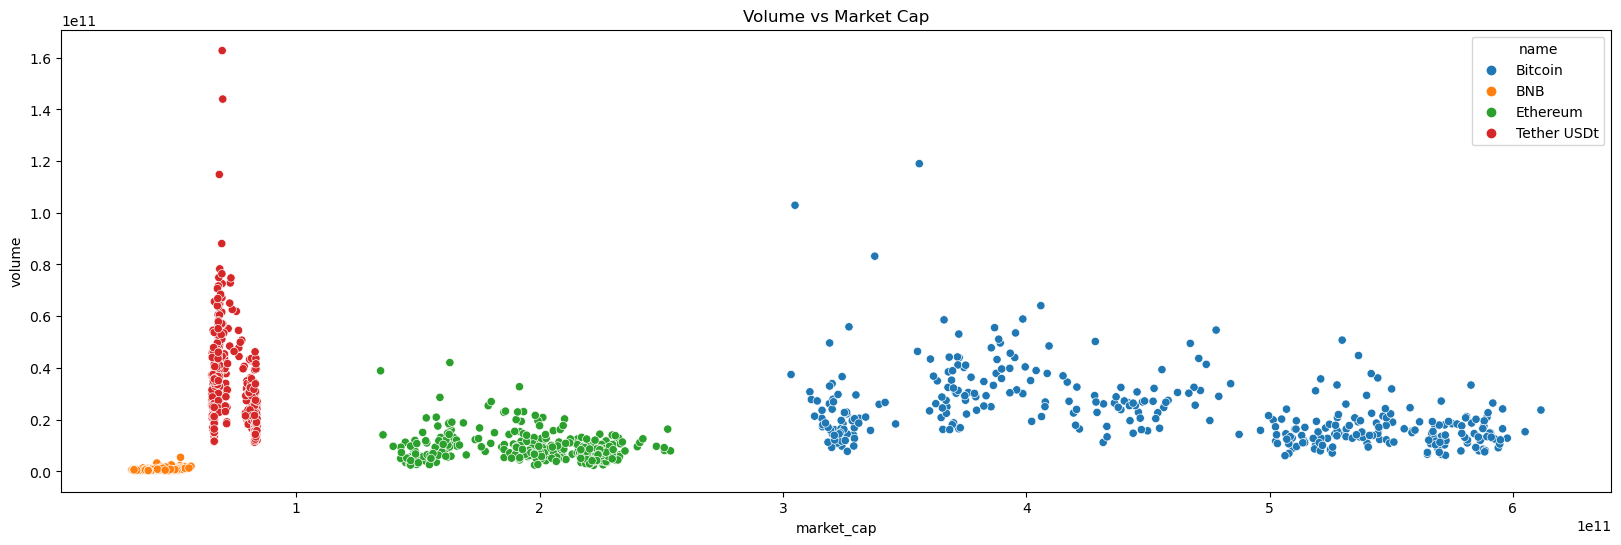

In [5]:
fig , ax = plt.subplots(figsize = (20 , 6))
sns.scatterplot(df , x = 'market_cap' , y = 'volume' , ax = ax , hue = 'name')
ax.set_title('Volume vs Market Cap')


Text(0.5, 1.0, 'Opening Price vs Closing Price')

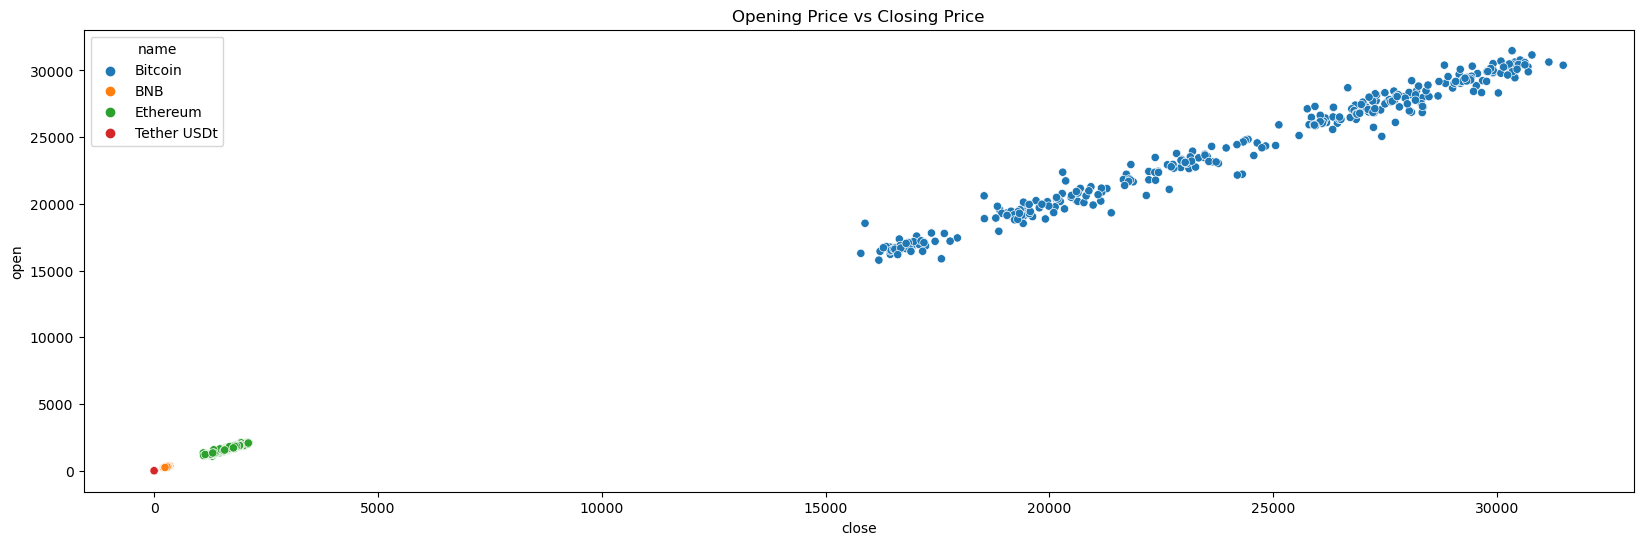

In [6]:
fig , ax = plt.subplots(figsize = (20 , 6))
sns.scatterplot(df , x = 'close' , y= 'open' , ax = ax , hue = 'name')
ax.set_title('Opening Price vs Closing Price')

Text(0.5, 1.0, 'Highest Price vs Lowest Price')

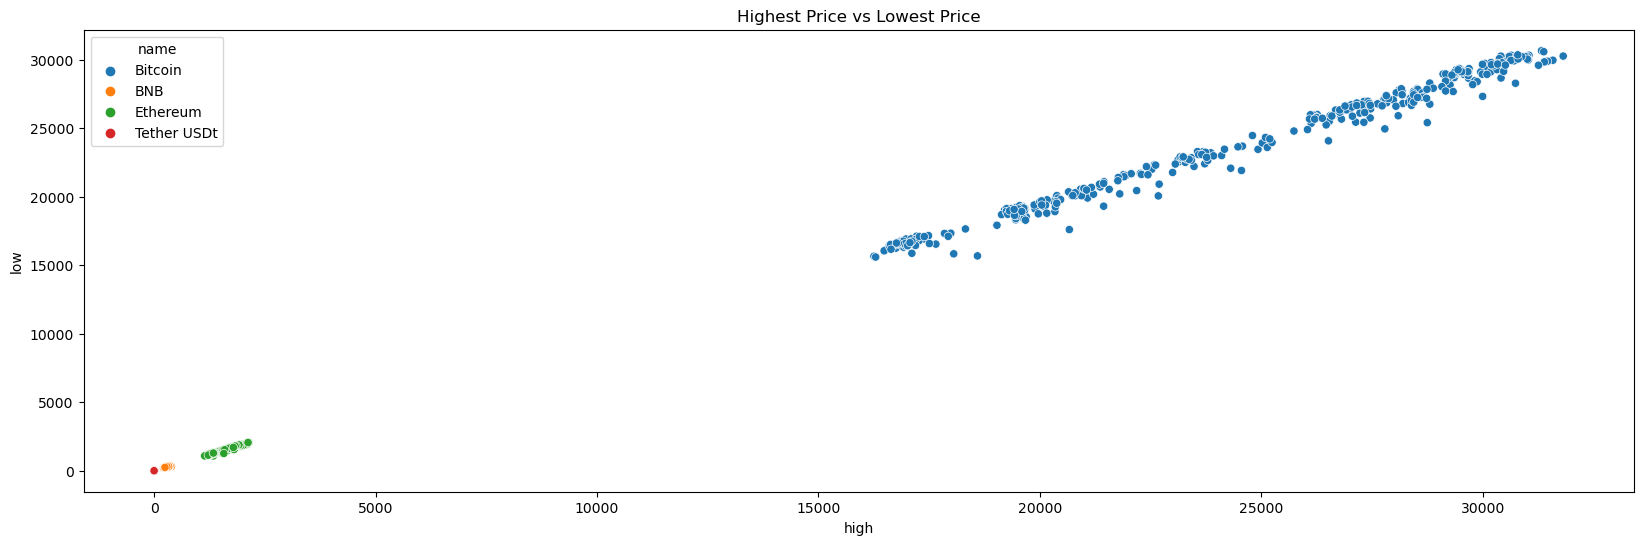

In [7]:
fig , ax = plt.subplots(figsize = (20 , 6))
sns.scatterplot(df , x = 'high' , y = 'low' , ax =ax , hue = 'name')
ax.set_title('Highest Price vs Lowest Price')

In [8]:
def plot_candlestick(df ,coin_name):
    coin = df[df['name'] == coin_name].sort_values('time_stamp')
    fig = go.Figure(
        data = [go.Candlestick(x = coin['time_stamp'],
                                   open = coin['open'],
                                   high = coin['high'],
                                   low = coin['low'],
                                   close = coin['close'])]
    )
    fig.update_layout(
        title = f'{coin_name} Candlestick',
        yaxis_title = f'{coin_name} Price'
    )

    fig.show()

In [9]:
plot_candlestick(df , 'Bitcoin')

In [10]:
plot_candlestick(df , 'BNB')

In [11]:
plot_candlestick(df , 'Ethereum')

In [12]:
plot_candlestick(df , 'Tether USDt')

In [13]:
def plot_decision_boundary(df , model , ax , clusters = 5):
    n = df.shape[0]
    x_min , x_max = df[: , 0].min() -1 , df[: , 0].max() +1 
    y_min , y_max = df[: , 1].min() -1 , df[: , 1].max() + 1
    xx ,yy = np.meshgrid(np.linspace(x_min , x_max , n) , np.linspace(y_min , y_max , n))

    z = model.predict(np.c_[xx.ravel() , yy.ravel()])
    z = z.reshape(xx.shape)

    ax.imshow(
        z,
        interpolation = 'nearest',
        extent = (xx.min() , xx.max() ,yy.min() , yy.max()),
        cmap = plt.cm.Paired,
        aspect = 'auto',
        origin = 'lower',

    )

    ax.plot(df[: , 0] ,df[: , 1] , 'k.' , markersize =2 )

    centroids = model.cluster_centers_
    ax.scatter(
        centroids[: , 0],
        centroids[: , 1],
        marker = 'x',
        s = 169,
        linewidths = 3,
        color = 'w',
        zorder = 10,

    )
    ax.set_title(f'K_means Clustering on the Top 4 crypto currencies (with {clusters} clusters) \n and inertia of {model.inertia_}')
    ax.set_ylabel('Volume')
    ax.set_xlabel('Market Cap');

In [14]:
from sklearn.cluster import KMeans

df_mv = df[['market_cap' , 'volume']].to_numpy()
kmeans = KMeans(n_clusters = 5 , n_init = 'auto' , random_state = 42)
kmeans.fit(df_mv)

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



KMeans(n_clusters=5, n_init='auto', random_state=42)

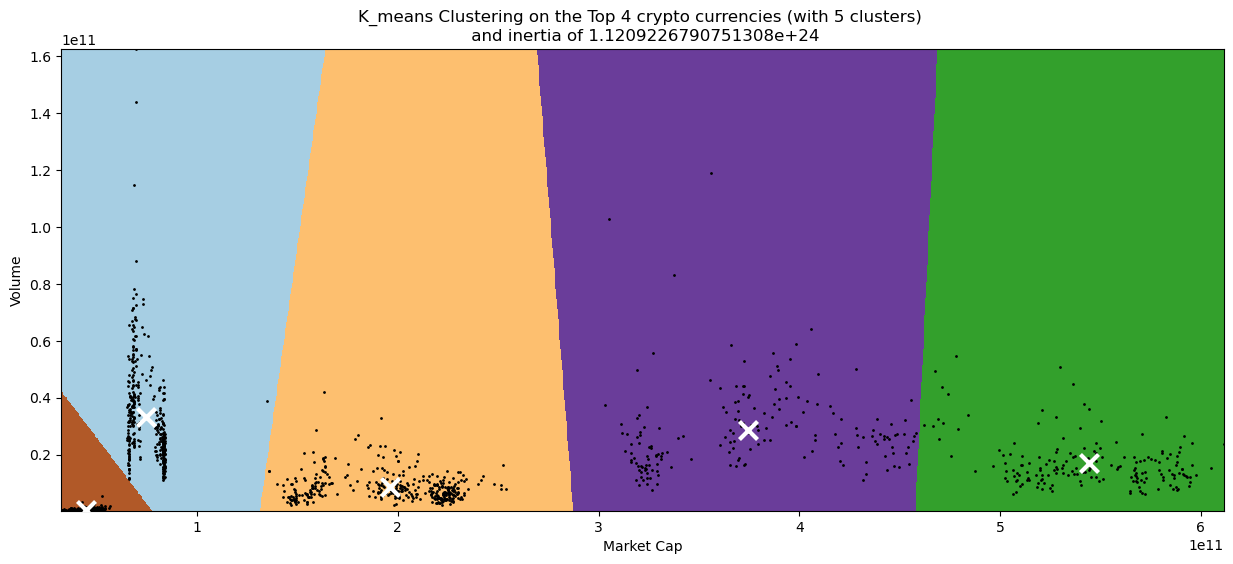

In [15]:
fig , ax = plt.subplots(figsize = (15 ,6))
plot_decision_boundary(df_mv , kmeans , ax)

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

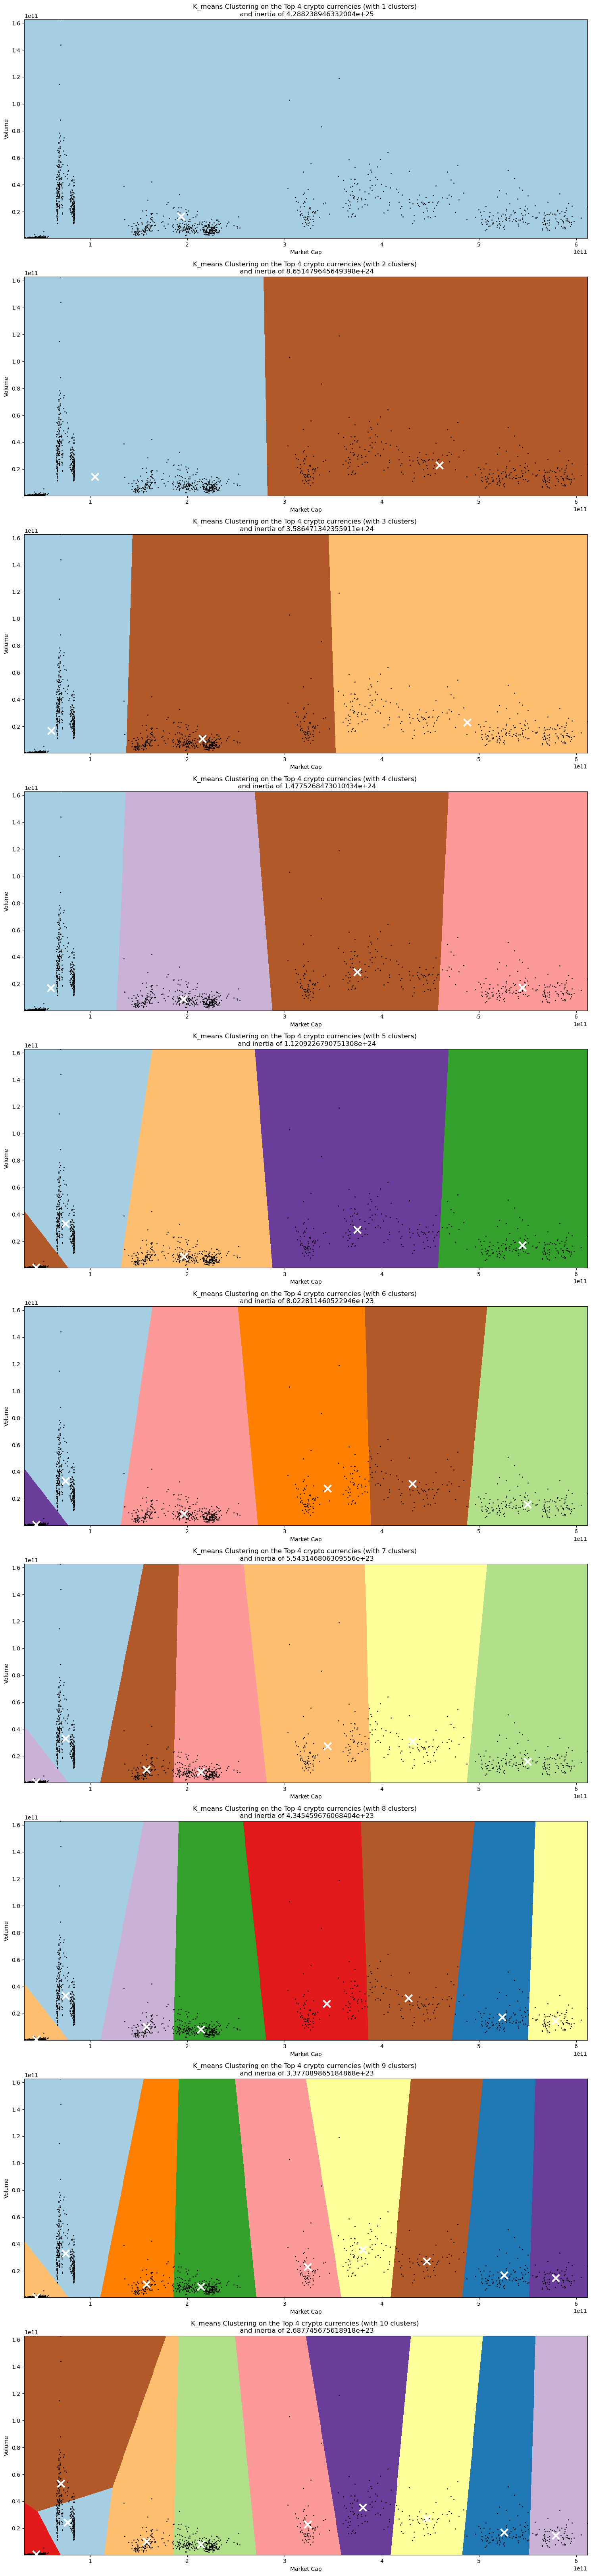

In [16]:
fig , ax = plt.subplots(nrows = 10 , ncols = 1, figsize = (15 , 65))
df_mv = df[['market_cap' , 'volume']].to_numpy()
i = 0

for n_clusters in range(1 , 11):
    kmeans = KMeans(n_clusters = n_clusters , n_init = 'auto' , random_state = 42)
    kmeans.fit(df_mv)
    plot_decision_boundary(df_mv , kmeans , ax[i], n_clusters)
    i += 1

plt.tight_layout()

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

c:\Users

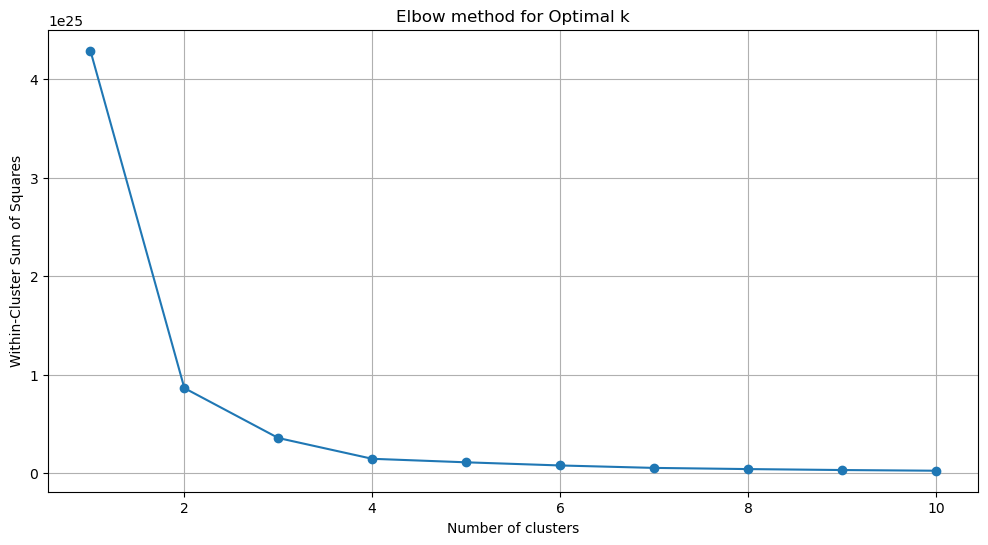

In [44]:
from sklearn.cluster import KMeans
#WCSS Method
X = df[['market_cap' , 'volume']]
wcss = []

k_values = range(1 , 11)

for k in k_values:
    kmeans = KMeans(n_clusters = k , random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12 , 6))
plt.plot(k_values, wcss , marker = 'o' , linestyle = ('-'))
plt.title('Elbow method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.show()

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\falla\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

c:\Users

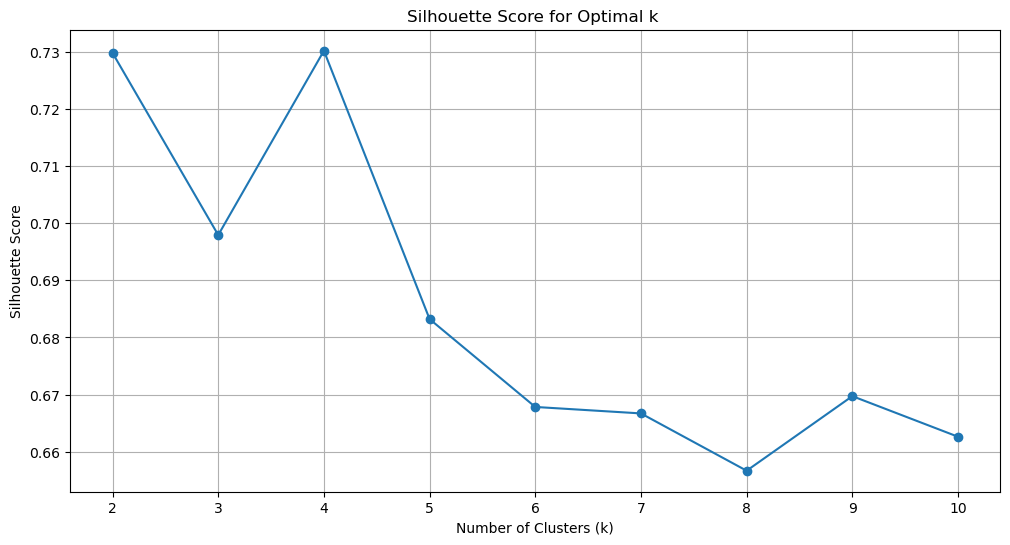

Optimal k (based on silhouette score) is: 4


In [45]:
from sklearn.metrics import silhouette_score as shs

silhouette_scores = []
k_values = range(2 , 11)
for k in k_values:
    kmeans = KMeans(n_clusters = k , random_state = 0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = shs(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (12 , 6))
plt.plot(k_values , silhouette_scores , marker = 'o' , linestyle = '-')
plt.title('Silhouette Score for Optimal k ')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

optimal_k = k_values[silhouette_scores.index((max(silhouette_scores)))]
print(f'Optimal k (based on silhouette score) is: {optimal_k}')

In [40]:
from sklearn.metrics import silhouette_score as shs

def GridSearch(combinations , X):
    from sklearn.cluster import DBSCAN
    scores = []
    all_label = []

    for i , (eps , num_samples , metric) in enumerate(combinations):
        db = DBSCAN(eps = eps , min_samples = num_samples , metric = metric).fit(X)
        labels = db.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -=1
        if num_clusters < 3 or num_clusters > 6:
            scores.append(-20)
            all_label.append('Poor')
            continue
        scores.append(shs(X , labels))
        all_label.append(labels)
        print(f'Iteration #{i}, epsilon = {eps} ,min_samples ={num_samples}, metric = {metric} , number_of_clusters = {num_clusters}')
        print(f'Iteration #{i},' , ', score :' , scores[-1] , ' number of clusters :' , num_clusters ,'\n\n')
    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_label = all_label[best_index]
    best_score = scores[best_index]
    return {
        'best_epsilon' : best_parameters[0],
        'best_min_samples' : best_parameters[1],
        'best_metric' : best_parameters[2],
        'best_labels' : best_label,
        'best_score' : best_score
    }




In [41]:
import itertools

epsilon = np.linspace(0.0001 , 1 , 100)
min_samples = np.arange(1 , 200 , 20)
metric = ['cityblock' , 'cosine' ,'euclidean' , 'l1' , 'l2', 'manhattan']
combinations = list(itertools.product(epsilon , min_samples , metric))
len(combinations)

6000

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_mv = scaler.fit_transform(df_mv)

best_params = GridSearch(combinations , df_mv)


Iteration #7, epsilon = 0.0001 ,min_samples =21, metric = cosine , number_of_clusters = 4
Iteration #7, , score : -0.004913750336176558  number of clusters : 4 


Iteration #66, epsilon = 0.010199999999999999 ,min_samples =21, metric = cityblock , number_of_clusters = 3
Iteration #66, , score : 0.015564431535040292  number of clusters : 3 


Iteration #67, epsilon = 0.010199999999999999 ,min_samples =21, metric = cosine , number_of_clusters = 3
Iteration #67, , score : 0.5188084745286738  number of clusters : 3 


Iteration #69, epsilon = 0.010199999999999999 ,min_samples =21, metric = l1 , number_of_clusters = 3
Iteration #69, , score : 0.015564431535040292  number of clusters : 3 


Iteration #71, epsilon = 0.010199999999999999 ,min_samples =21, metric = manhattan , number_of_clusters = 3
Iteration #71, , score : 0.015564431535040292  number of clusters : 3 


Iteration #73, epsilon = 0.010199999999999999 ,min_samples =41, metric = cosine , number_of_clusters = 4
Iteration #73, , sco

In [27]:
best_params

{'best_epsilon': 0.2829,
 'best_min_samples': 21,
 'best_metric': 'euclidean',
 'best_labels': array([0, 0, 1, ..., 3, 3, 4], dtype=int64),
 'best_score': 0.5927996007134657}

In [28]:
from sklearn.cluster import DBSCAN

df_mv = df[['market_cap' , 'volume']]
scaler = StandardScaler()
df_mv = scaler.fit_transform(df_mv)
db = DBSCAN(eps = best_params['best_epsilon'] , min_samples = best_params['best_min_samples'] , metric = best_params['best_metric'])
db.fit(df_mv)

labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 5
Estimated number of noise points: 74


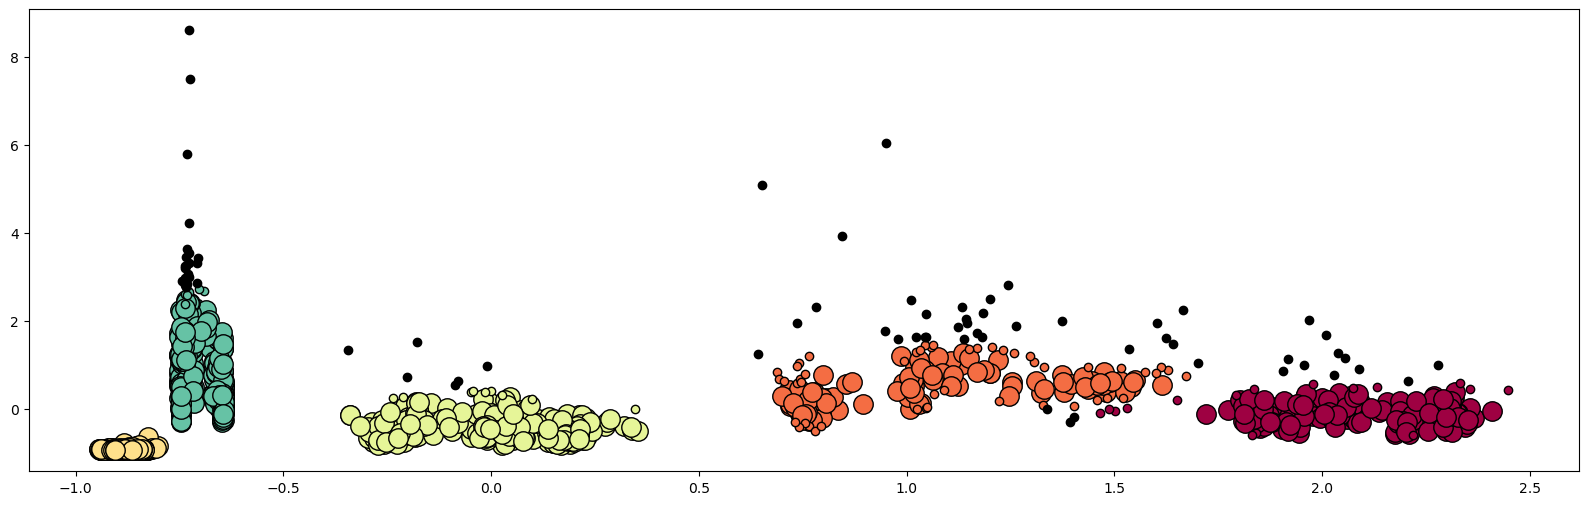

In [29]:
fig , ax = plt.subplots(figsize = (20 , 6))
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels , dtype = bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0 ,1 ,len(unique_labels))]
for k , col in zip(unique_labels , colors):
    if k == -1:
        col = [0 , 0 , 0 ,1]

    class_number_mask = labels == k
    xy = df_mv[class_number_mask & core_samples_mask]
    ax.plot(
        xy[: , 0],
        xy[: , 1],
        "o",
        markerfacecolor = tuple(col),
        markeredgecolor ="k",
        markersize = 14 ,
    )

    xy = df_mv[class_number_mask & ~core_samples_mask]
    ax.plot(
        xy[: , 0],
        xy[: , 1],
        "o",
        markerfacecolor = tuple(col),
        markeredgecolor = "k",
        markersize = 6,
    )
